import the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('iris.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
df.duplicated().sum()
print(f'Number of duplicated rows: {df.duplicated().sum()}')

Number of duplicated rows: 3


In [7]:
df.drop_duplicates(inplace=True)
duplicated_count = df.duplicated().sum()
print(f'Number of duplicated rows after dropping duplicates: {duplicated_count}')

Number of duplicated rows after dropping duplicates: 0


In [8]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [9]:
df['species'].value_counts()

species
versicolor    50
virginica     49
setosa        48
Name: count, dtype: int64

In [10]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


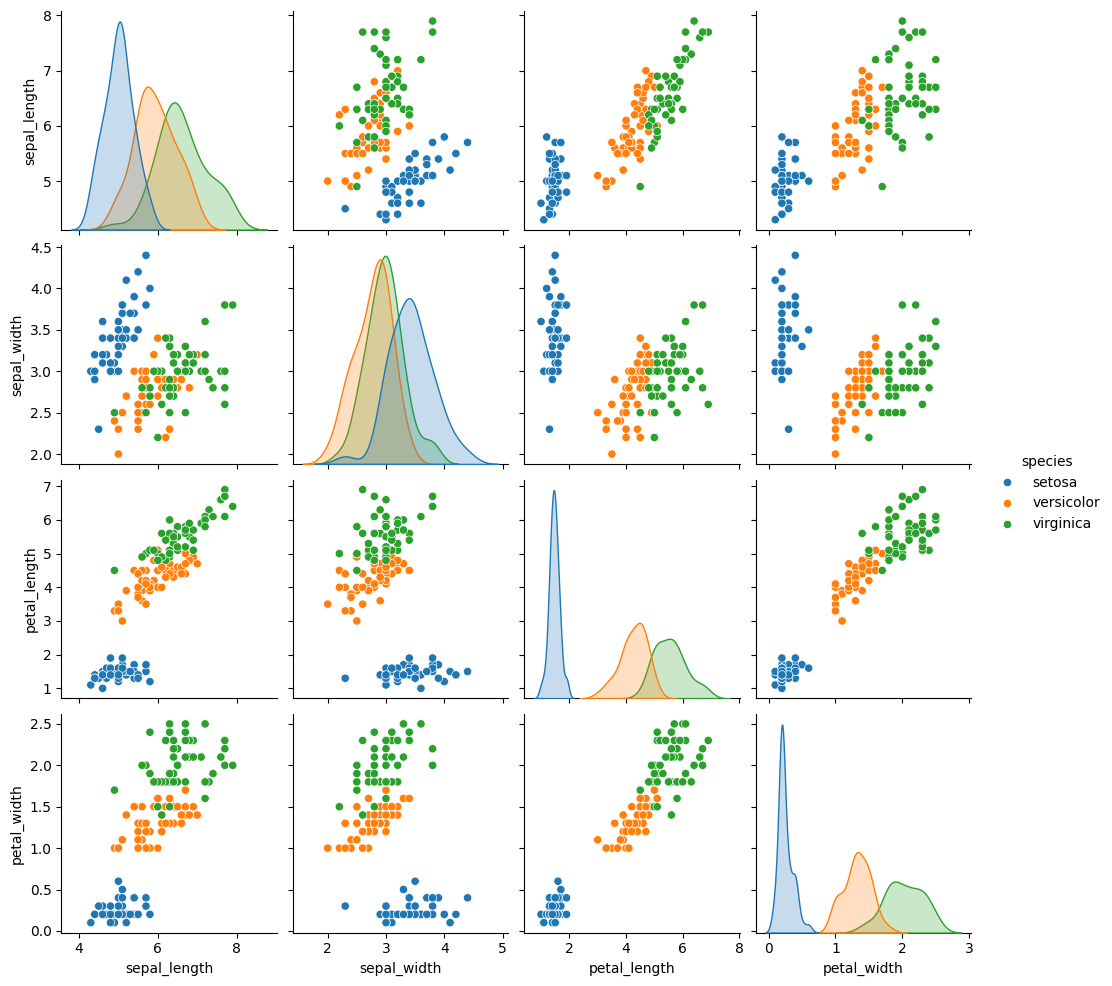

In [11]:
sns.pairplot(df, hue='species')

<Axes: xlabel='petal_length', ylabel='Count'>

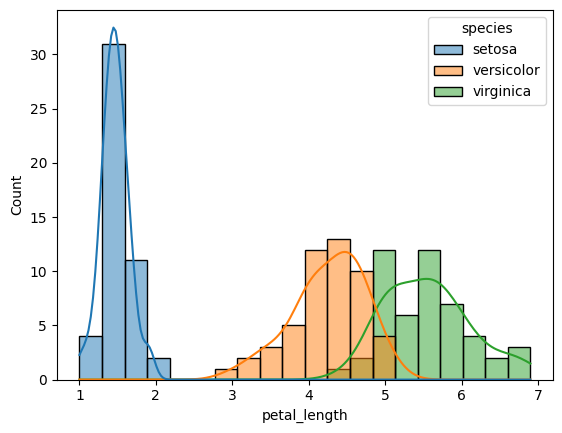

In [12]:
sns.histplot(data=df, x='petal_length', kde=True, hue='species', bins=20)

<Axes: xlabel='sepal_length', ylabel='Count'>

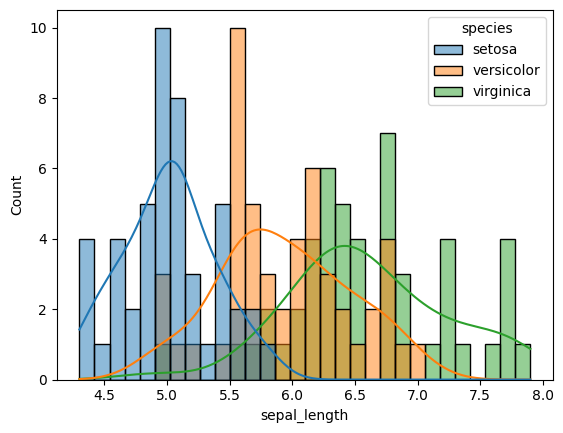

In [13]:
sns.histplot(data=df, x='sepal_length', kde=True, hue='species', bins=30)

<Axes: xlabel='sepal_width', ylabel='Count'>

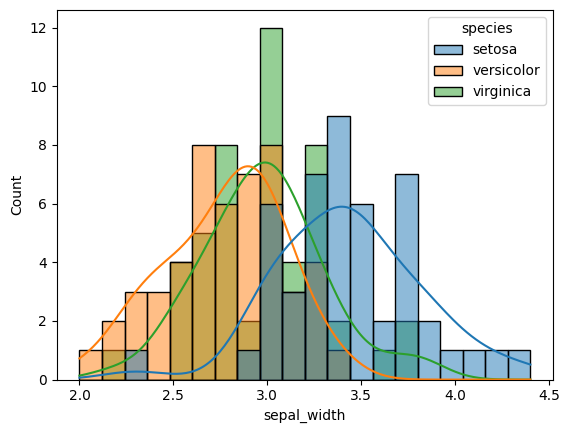

In [23]:
sns.histplot(data=df, x='sepal_width', kde=True, hue='species', bins=20)

<Axes: xlabel='petal_width', ylabel='Count'>

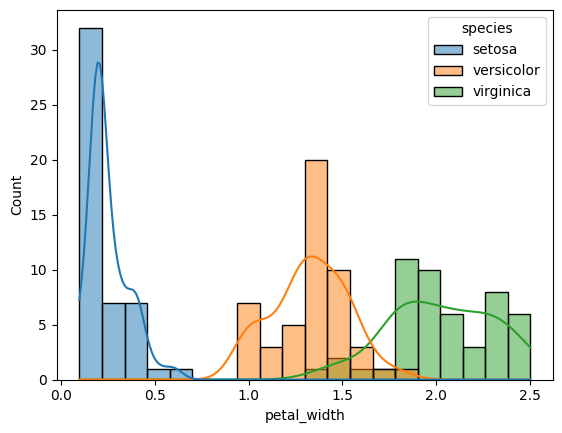

In [15]:
sns.histplot(data=df, x='petal_width', kde=True, hue='species', bins=20)

petal and setosa is the most important in case of segregtion and prediction

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

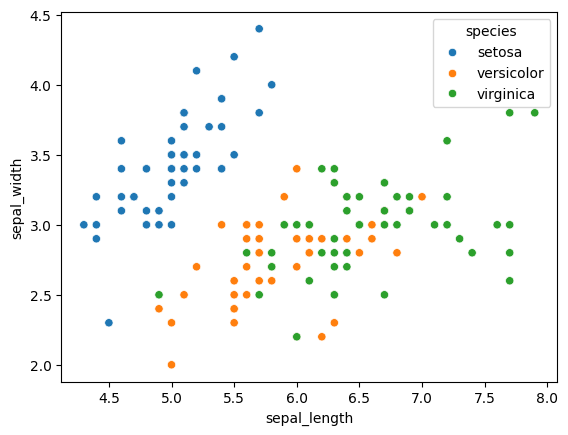

In [16]:
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='species')

<Axes: xlabel='petal_length', ylabel='petal_width'>

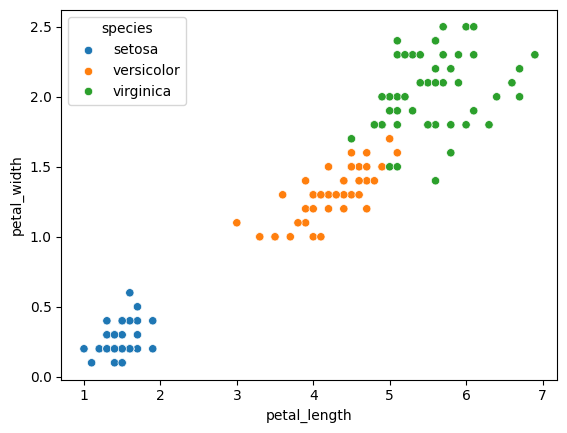

In [17]:
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species')

from the above analysis we can say the most important feature to analyse the species is petal_length and petal_width 

In [18]:
# sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
# sns.heatmap(df.drop('species', axis=1).corr(), annot=True)

In [19]:
Q1 = df.drop('species', axis=1).quantile(0.25)
Q3 = df.drop('species', axis=1).quantile(0.75)
IQR = Q3 - Q1
outliers = ((df.drop('species', axis=1) < (Q1 - 1.5 * IQR)) |
            (df.drop('species', axis=1) > (Q3 + 1.5 * IQR)))
outliers.sum()

sepal_length    0
sepal_width     4
petal_length    0
petal_width     0
dtype: int64

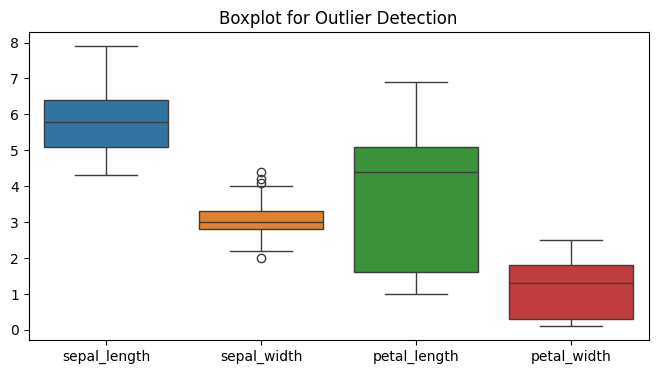

In [20]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df.drop('species', axis=1))
plt.title("Boxplot for Outlier Detection")
plt.show()

<Axes: xlabel='species', ylabel='sepal_length'>

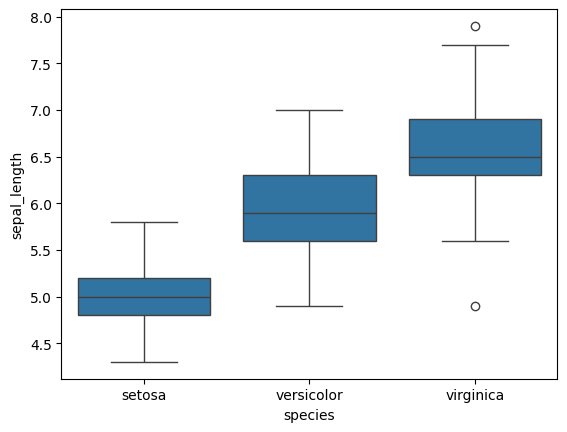

In [21]:
sns.boxplot(data=df, x='species', y='sepal_length')

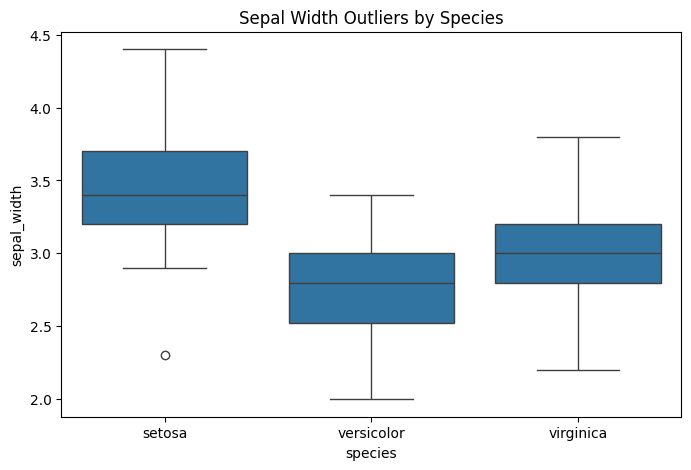

In [22]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='species', y='sepal_width', data=df)
plt.title("Sepal Width Outliers by Species")
plt.show()
